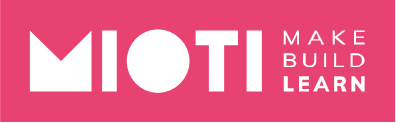
<br/>
<center style="color:#888">Master Deep Learning<br/>Asignatura Computer Vision</center>
<center style="color:#aaa; margin-top:10px;">Prof. Óscar Picazo Montoya<br>oscarpm@faculty.mioti.es</center>


# Challenge S2: Aprendiendo a ver en la oscuridad

## Objetivos

El objetivo de este challenge es procesar las imágenes que obtiene una camera de seguridad noctura. Aplicaremos las técnicas que conocemos de procesamiento de imagen para preprocesar las imagenes de entrada.

## Configuración del entorno

In [1]:
# !pip install scikit-image

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from skimage import data, io, filters
from skimage.color import rgb2gray

import warnings
warnings.filterwarnings("ignore")

In [3]:
def plot_histogram(img):
    from matplotlib import pyplot as plt
    n_dimensiones = len(img.shape)
    if n_dimensiones == 2: # Solo X,Y
        img_int = 255 * img.flatten()    
        plt.hist(img_int, bins = np.arange(256), color="darkgrey")
        plt.title("Gray scale histogram") 
    elif n_dimensiones == 3: # X,Y y Canal
        if img.shape[2] == 3: # R,G,B
            img_r = img[:,:,0].flatten()        
            img_g = img[:,:,1].flatten()
            img_b = img[:,:,2].flatten()
            
            if img.dtype == np.dtype('uint8'):
                plt.hist(img_r, bins = np.arange(256), color = "red") 
                plt.hist(img_g, bins = np.arange(256), color = "green")
                plt.hist(img_b, bins = np.arange(256), color = "blue")
            else:
                plt.hist(img_r, bins = np.arange(1, step=1/255), color = "red") 
                plt.hist(img_g, bins = np.arange(1, step=1/255), color = "green")
                plt.hist(img_b, bins = np.arange(1, step=1/255), color = "blue")

            plt.title("Color histogram") 
    plt.show()

## Flujo de procesamiento

### 1) En este primer paso carga la imagen (`"img/1.jpg"`) en memoria:

In [4]:
img1 = io.imread("img/1.jpg")

### 2) ¿Qué dimensiones tiene? ¿En qué espacio de color está?

In [5]:
img1.shape

(2848, 4256, 3)

* El espacio de color es RGB, ya que se observa una 3 dimensión.

### 3) Muestra la imagen en pantalla:

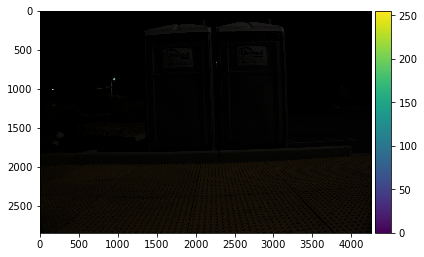

In [6]:
io.imshow(img1)
io.show()

### 4) ¿Qué se ve en la imagen?

* La imagen es muy oscura pero se pueden intuir un par de cabinas o de letrinas portátiles.

### 5) Dibuja el histograma y describe la imagen mediante el histograma.

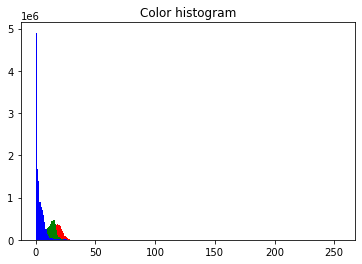

In [7]:
plot_histogram(img1)

 * Según el histograma lo que vemos es que se concentarn la gran mayoría de los valores cerca del 0 por lo que se deduce que está muy oscura.

### 6) ¿Se te ocurre alguna manera de mejorar la imagen?

* Aplicarle un filtro de ecualización normal.

In [8]:
from skimage import exposure

img_equalized = exposure.equalize_hist(img1)

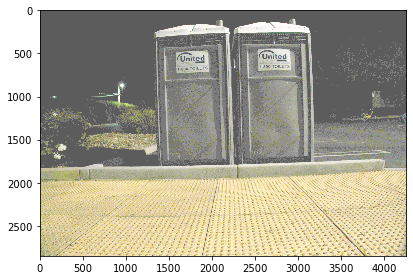

In [9]:
io.imshow(img_equalized)
io.show()

* También podemos aplicarle un filtro de ecualización adaptativo

In [10]:
from skimage import exposure
img_equalized_adaptative = exposure.equalize_adapthist(img1, clip_limit=0.05)

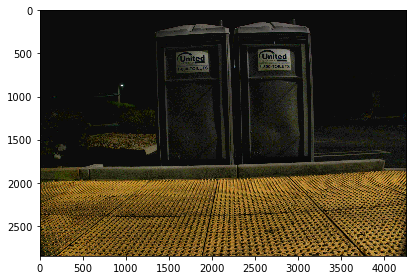

In [11]:
io.imshow(img_equalized_adaptative)
io.show()

* En este caso la imagen se ve un poco más oscura que la que reultó de aplicarles el filtro normal 

### 7) ¿Puedes describir el histograma de la imagen resultante?

* Al aplicar el filtro de ecualización normal

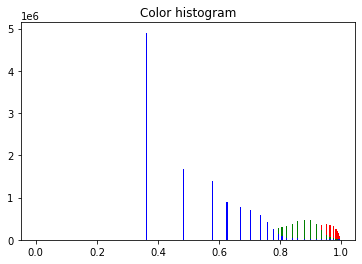

In [12]:
plot_histogram(img_equalized)

* Vemos que los valores se han repartido incluso tendiendo más al 1 por lo que esa es la razón por la que para este filtro se ha aclarado bastante la imagen

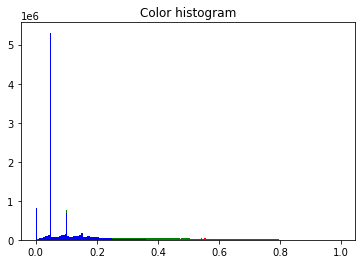

In [13]:
plot_histogram(img_equalized_adaptative)

* Vemos que los valores se han repartido pero sigue habiendo bastante frecuencia cerca del 0 y poco se ha repartido cerca del 1 por lo que esa es la razón por la que para este filtro adaptativo no es tan claro como el normal.

### 8) Obten la imagen de bordes 

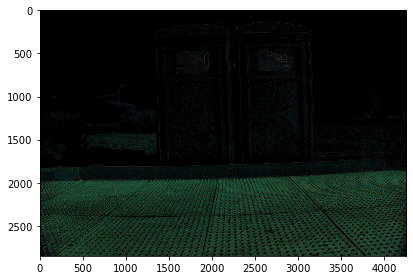

In [14]:
from skimage.filters import sobel
sobell = sobel(img_equalized_adaptative)
io.imshow(sobell)
io.show()

* La imagen sale muy oscura y apenas se pueden distinguir los bordes

### 9) ¿Se te ocurre alguna manera de mejorarlo?

*  Aplicamos un filtro de la mediana para quitar el ruido de la imagen en formato escala de grises, sobre la imagen ecualizada de tipo normal

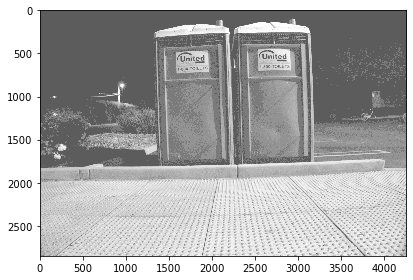

In [15]:
from skimage.filters import median
median_equalized = median(rgb2gray(img_equalized))
io.imshow(median_equalized)
io.show()


* Aplicamos sobel para ver si ya conseguimos claramente los bordes.

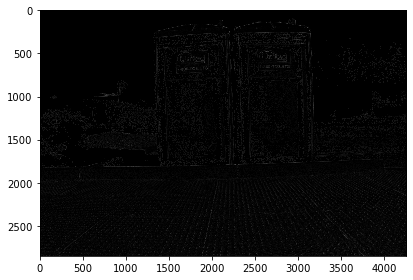

In [16]:
from skimage.filters import sobel
sobel_median_equalized = sobel(median_equalized)
io.imshow(sobel_median_equalized)
io.show()

* Intentamos aplicar el filtro prewitt, también indicado para sacar bordes, por ver si conseguimos mejora.

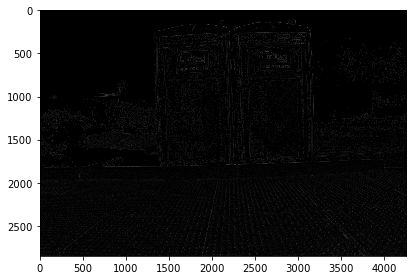

In [17]:
from skimage.filters import prewitt
prewitt_median_equalized = prewitt(median_equalized)
io.imshow(prewitt_median_equalized)
io.show()

* Intentamos aplicar el filtro scharr, también indicado para sacar bordes, por ver si conseguimos mejora a sobel y prewitt

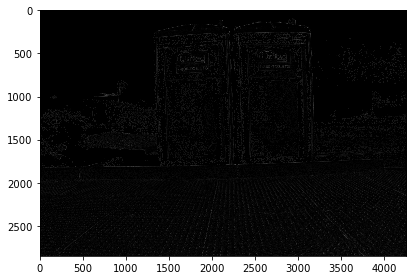

In [18]:
from skimage.filters import scharr
scharr_median_equalized = scharr(median_equalized)
io.imshow(scharr_median_equalized)
io.show()


* Como cualquiera de los filtros sobel, prewitt y sharr, nos sale una imagen oscura, intentamos darla un poco más de claridad volviendo a aplicar un filtro de ecualización normal.

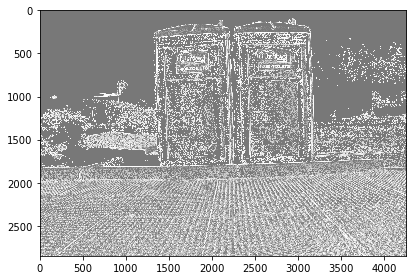

In [19]:
equalized_sobel_median_equalized = exposure.equalize_hist(sobel_median_equalized)
io.imshow(equalized_sobel_median_equalized)
io.show()

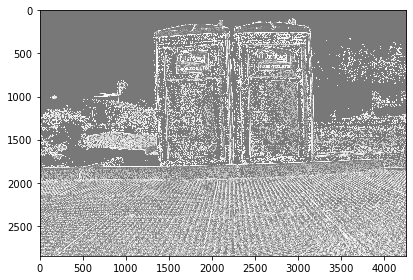

In [20]:
equalized_prewitt_median_equalized = exposure.equalize_hist(prewitt_median_equalized)
io.imshow(equalized_prewitt_median_equalized)
io.show()

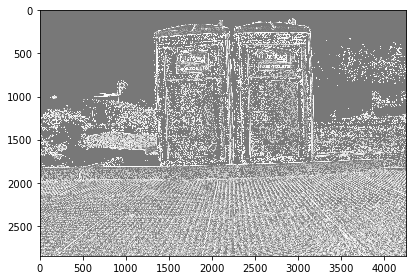

In [21]:
equalized_sharr_median_equalized = exposure.equalize_hist(scharr_median_equalized)
io.imshow(equalized_sharr_median_equalized)
io.show()

* Finalmente obtenemos una imagen más nitida en el que se observan los bordes, quizas con el filtro sharr un poco más difuminados.

### 10) ¿Podrías describir un pipeline típico de trabajo?. Con lo que ya sabes reordena los pasos anteriores y describe como obtendrías una buena imagen de bordes.

* El pipeline de trabajo podría ser:
    * Cargar las imagen o imagenes.
    * Visualizar las dimensiones, para ver las dimensiones de alto y ancho de pixeles así como el espacio de color que tiene (Blanco-Negro, Escala de Grises o Color (RGB\BRG)).
    * Visualizar la propia imagen y/o el histograma. Para ver si la imagen esta muy oscura o muy clara, y en histograma ver si los valores se concentran cerca del 0 (MUY OSCURA)o cerca del 1 (MUY CLARA).
    * **Los siguientes pasos habría que realizarlos si se observan alguna de las cuestiones que se comentan:**
        * Si los valores están muy concentrados en los extremos, se necesitara aclarar o oscurecer, se aplica a la imagen filtro ecualizador o ecualizador adaptativo  es decir repartir los valores de los pixels, se procede aplicar un filtro equlizador o ecualizador adaptativo.
        * Si viene en color (RGB\BRG) se la convierte a escala de grises.
        * Si se observa que tiene mucho ruido, para eliminarlo se le pasa el filtro de la media.
    * Ahora ya preprocesada con los pasos anteriores, si hicieran falta, se procede a pasar a la imagen un filtro sobel, prewit o schar, para la deteccción de los bordes.
    * Si esta imagen saliera oscura y no se visualizaran bien los bordes se le procede aplicar otro filtro ecualizador o ecualizador adaptativo